# Data 622
## Assignment 4 - Dimension Reduction
Mark Ly

Student ID: 00504696

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn imports
# sklearn model selection and metrics
from sklearn.preprocessing import StandardScaler

# cluster
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis


# Creating samples
Creating 10,000 random samples following 2 latent factors using numpy.random.normal where we have a mean of 0 and
variance of 1.
- $f_1$ ~ N(0,1)
- $f_2$ ~ N(0,1)

From these latent factors, we will create 10,000 samples from the 5 following linear relationships.
- x1 = $2f_1$ + $3f_2$ + $\epsilon$
- x2 = $f_1$ - $10f_2$ + $\epsilon$
- x3 = $-5f_1$ + $5f_2$ + $\epsilon$
- x4 = $7f_1$ + $11f_2$ + $\epsilon$
- x5 = $-6f_1$ - $7f_2$ + $\epsilon$

where $\epsilon ~ N(0,1)$

Since we need one set that has 10,000 samples, the sample size for each linear equation will be 2000.

In [305]:
# setting up variables for linear equations
mean = 0
variance = 1
f1 = np.random.normal(loc=mean,scale = np.sqrt(variance),size=[1,2000])
f2 = np.random.normal(loc=mean,scale = np.sqrt(variance),size=[1,2000])
e = np.random.normal(loc=mean,scale = np.sqrt(variance),size=[1,2000])

# creating 5 factors based on 5 linear equations
x1 = 2*f1 + 3*f2 + e
x2 = f1 - 10*f2 + e
x3 = -5*f1 + 5*f2 + e
x4 = 7*f1 + 11*f2 + e
x5 = -6*f1 -7*f2 + e

x = np.vstack((x1,x2,x3,x4,x5)).T
print(x)

# checking number of samples in generated dataset
print(np.count_nonzero(x))

[[ -0.29776879   2.23182003   2.60474447  -3.8719206    4.97514395]
 [ -2.32288136   7.42524073  -2.14762886  -9.3483163    6.86864804]
 [  0.78405604  -1.41600066   0.49857161   2.52036093  -1.53895915]
 ...
 [ -5.27263331   7.46029964  -0.82234764 -17.03650274  11.00004504]
 [ -0.28507951  13.51701534  -6.34072341  -6.36859089   6.35738964]
 [  2.39104901  -6.47736001   4.20119828   7.5753123   -3.9802321 ]]
10000


# Standard Scaling
We will scale our data with zero mean and unit variance using the StandardScalar function from scikit learn

[[-0.09371943  0.23897691  0.35591159 -0.31351532  0.55438878]
 [-0.64061456  0.76571567 -0.31048751 -0.73915079  0.76148021]
 [ 0.19843457 -0.13100053  0.06057459  0.18330447 -0.15805485]
 ...
 [-1.43721472  0.76927149 -0.12465063 -1.33669067  1.21332867]
 [-0.09029261  1.38356929 -0.89846203 -0.50756109  0.70556418]
 [ 0.63241372 -0.64434506  0.57977351  0.57618451 -0.42505544]]


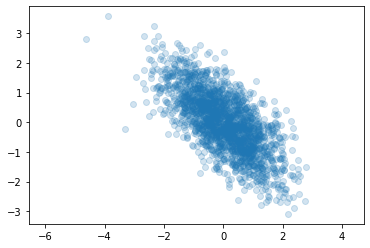

In [306]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
# Visually checking data
print(X)
plt.scatter(X[:, 0], X[:, 1],alpha=0.2)
plt.axis('equal');

# PCA
We will reduce our data set with 5 components to one with 2 components with PCA first on the entire data. Afterwards
we will create 4 scatter plots in a 2x2 figure.
- $f_1$ vs. First component
- $f_1$ vs. Second component
- $f_2$ vs. First component
- $f_2$ vs. Second component

In [307]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_) # eigenvectors
print(pca.explained_variance_) # percentage of the variance of each component

[[-0.49718902  0.46121384 -0.20854537 -0.51231431  0.4838675 ]
 [-0.20065595 -0.39873943  0.81316444 -0.19352121  0.31946391]]
[3.62765984 1.26275225]


[Text(0.5, 0, 'f2'),
 Text(0, 0.5, '2nd component'),
 Text(0.5, 1.0, 'f2 vs 2nd component')]

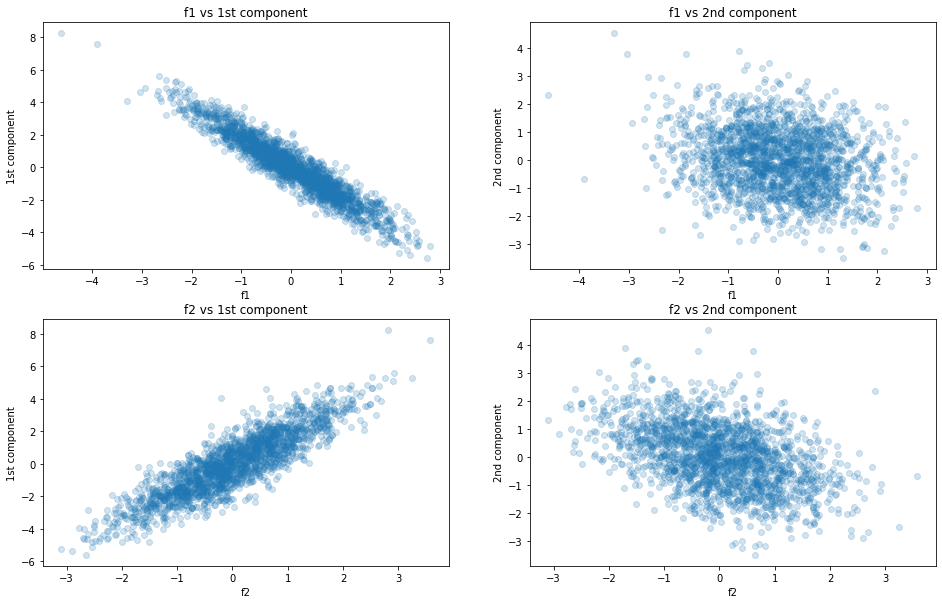

In [308]:
X_pca = pca.transform(X)
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

ax[0,0].scatter(X[:, 0], X_pca[:, 0], alpha=0.2)
ax[0,0].set(xlabel='f1', ylabel='1st component', title='f1 vs 1st component')
ax[0,1].scatter(X[:, 0], X_pca[:, 1], alpha=0.2)
ax[0,1].set(xlabel='f1', ylabel='2nd component', title='f1 vs 2nd component')
ax[1,0].scatter(X[:, 1], X_pca[:, 0], alpha=0.2)
ax[1,0].set(xlabel='f2', ylabel='1st component', title='f2 vs 1st component')
ax[1,1].scatter(X[:, 1], X_pca[:, 1], alpha=0.2)
ax[1,1].set(xlabel='f2', ylabel='2nd component', title='f2 vs 2nd component')

# PCA - Summary
From the scatter plots, we noticed that 2 of the graphs are highly correlated.
- $f_1$ vs. First component which has a negative linear relationship
- $f_2$ vs. First component which has a positive linear relationship

# Factor analysis

Using the same dataset, we will now perform a factor analysis that will reduce the dimensions from 5 to 2 and create
the same figure as from the PCA analysis. We notice that only the first 2 features are non-zero.

[[-0.95288096  0.78587894 -0.25550684 -0.97752341  0.94323509]
 [-0.08345484 -0.50527633  0.83425735 -0.06440761  0.18545426]
 [ 0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.         -0.         -0.        ]]


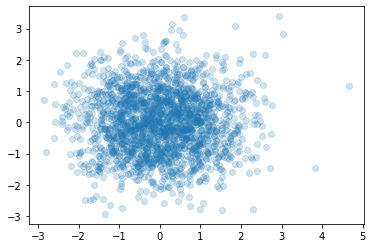

In [309]:
fa = FactorAnalysis().fit(X)
print(fa.components_)

# visualizing the factor analysis in 2D
X_fa = FactorAnalysis(n_components=2).fit_transform(X)
plt.scatter(X_fa[:, 0], X_fa[:, 1],alpha=0.2)

[Text(0.5, 0, 'f2'),
 Text(0, 0.5, '2nd component'),
 Text(0.5, 1.0, 'f2 vs 2nd component')]

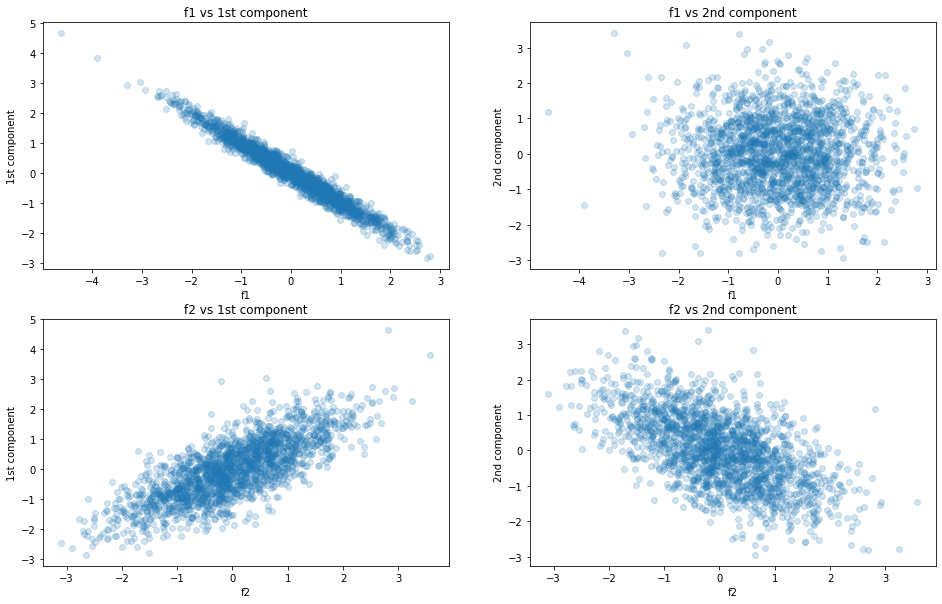

In [310]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

ax[0,0].scatter(X[:, 0], X_fa[:, 0], alpha=0.2)
ax[0,0].set(xlabel='f1', ylabel='1st component', title='f1 vs 1st component')
ax[0,1].scatter(X[:, 0], X_fa[:, 1], alpha=0.2)
ax[0,1].set(xlabel='f1', ylabel='2nd component', title='f1 vs 2nd component')
ax[1,0].scatter(X[:, 1], X_fa[:, 0], alpha=0.2)
ax[1,0].set(xlabel='f2', ylabel='1st component', title='f2 vs 1st component')
ax[1,1].scatter(X[:, 1], X_fa[:, 1], alpha=0.2)
ax[1,1].set(xlabel='f2', ylabel='2nd component', title='f2 vs 2nd component')

# Factor analysis - Summary
From the graph we notice that the same 2 combinations of plots are highly correlated. However, the positive sloped
scatter plot is not as well-defined as the output from the PCA analysis. Also, the scatter plot for $f_2$ and the
second component looks like it has some slight negative linearity to it as well.
- $f_1$ vs. First component which has a negative linear relationship
- $f_2$ vs. First component which has a positive linear relationship

